In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
# Neural network modeules
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Jitendra Sir ML Project/covid-19.csv')

<ipython-input-71-76aee3d365c3>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Jitendra Sir ML Project/covid-19.csv')


In [ ]:
df.sample(5)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
181464,2020-04-04,0.0,0.0,0.0,0.0,0.0,negative,No,male,Other
41903,2020-04-24,0.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other
276741,2020-03-14,0.0,0.0,0.0,0.0,0.0,negative,NaN,NaN,Other
72941,2020-04-20,0.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other
257732,2020-03-24,0.0,0.0,0.0,0.0,0.0,negative,No,male,Other


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   test_date            278848 non-null  object 
 1   cough                278596 non-null  float64
 2   fever                278596 non-null  float64
 3   sore_throat          278847 non-null  float64
 4   shortness_of_breath  278847 non-null  float64
 5   head_ache            278847 non-null  float64
 6   corona_result        278848 non-null  object 
 7   age_60_and_above     151528 non-null  object 
 8   gender               259285 non-null  object 
 9   test_indication      278848 non-null  object 
dtypes: float64(5), object(5)
memory usage: 21.3+ MB


In [ ]:
df['test_indication'].value_counts()

test_indication
Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: count, dtype: int64

In [ ]:
df.isnull().mean() * 100

test_date               0.000000
cough                   0.090372
fever                   0.090372
sore_throat             0.000359
shortness_of_breath     0.000359
head_ache               0.000359
corona_result           0.000000
age_60_and_above       45.659284
gender                  7.015650
test_indication         0.000000
dtype: float64

In [ ]:
cols = ['sore_throat','shortness_of_breath', 'head_ache']
df = df.dropna(subset=cols)

In [ ]:
df.shape

(278847, 10)

In [ ]:
df.duplicated().sum()

272207

In [ ]:
# Working with test_date column
# Converting to datetime datatype
df['test_date'] = pd.to_datetime(df['test_date'])

<ipython-input-79-cc96d088f6af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['test_date'] = pd.to_datetime(df['test_date'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278847 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   test_date            278847 non-null  datetime64[ns]
 1   cough                278596 non-null  float64       
 2   fever                278596 non-null  float64       
 3   sore_throat          278847 non-null  float64       
 4   shortness_of_breath  278847 non-null  float64       
 5   head_ache            278847 non-null  float64       
 6   corona_result        278847 non-null  object        
 7   age_60_and_above     151528 non-null  object        
 8   gender               259285 non-null  object        
 9   test_indication      278847 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 23.4+ MB


In [ ]:
df['test_date_month'] = df['test_date'].dt.month_name()
df.sample(5)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,test_date_month
243328,2020-03-26,0.0,0.0,0.0,0.0,0.0,negative,No,male,Other,March
209717,2020-04-01,0.0,0.0,0.0,0.0,0.0,negative,No,female,Other,April
249555,2020-03-25,1.0,0.0,0.0,0.0,0.0,negative,No,female,Abroad,March
186836,2020-04-03,0.0,0.0,0.0,0.0,0.0,negative,No,male,Other,April
130735,2020-04-13,1.0,1.0,0.0,0.0,0.0,negative,No,male,Other,April


In [ ]:
df['test_date_day'] = df['test_date'].dt.day
df.sample(5)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,test_date_month,test_date_day
187169,2020-04-03,0.0,0.0,0.0,0.0,0.0,negative,No,male,Other,April,3
110114,2020-04-16,0.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other,April,16
168125,2020-04-07,0.0,0.0,0.0,1.0,0.0,positive,No,female,Contact with confirmed,April,7
212274,2020-03-31,0.0,0.0,0.0,0.0,0.0,negative,Yes,male,Other,March,31
9452,2020-04-29,0.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other,April,29


## Univariate Analysis

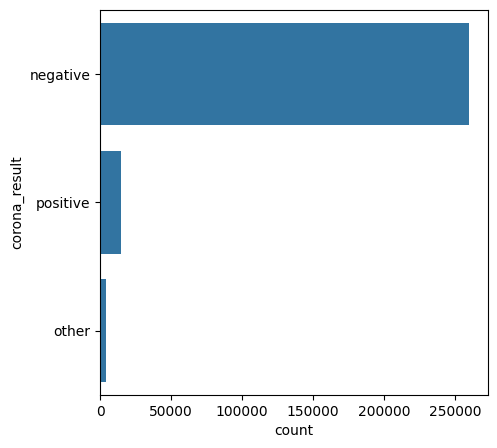

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(df['corona_result'])
plt.show()

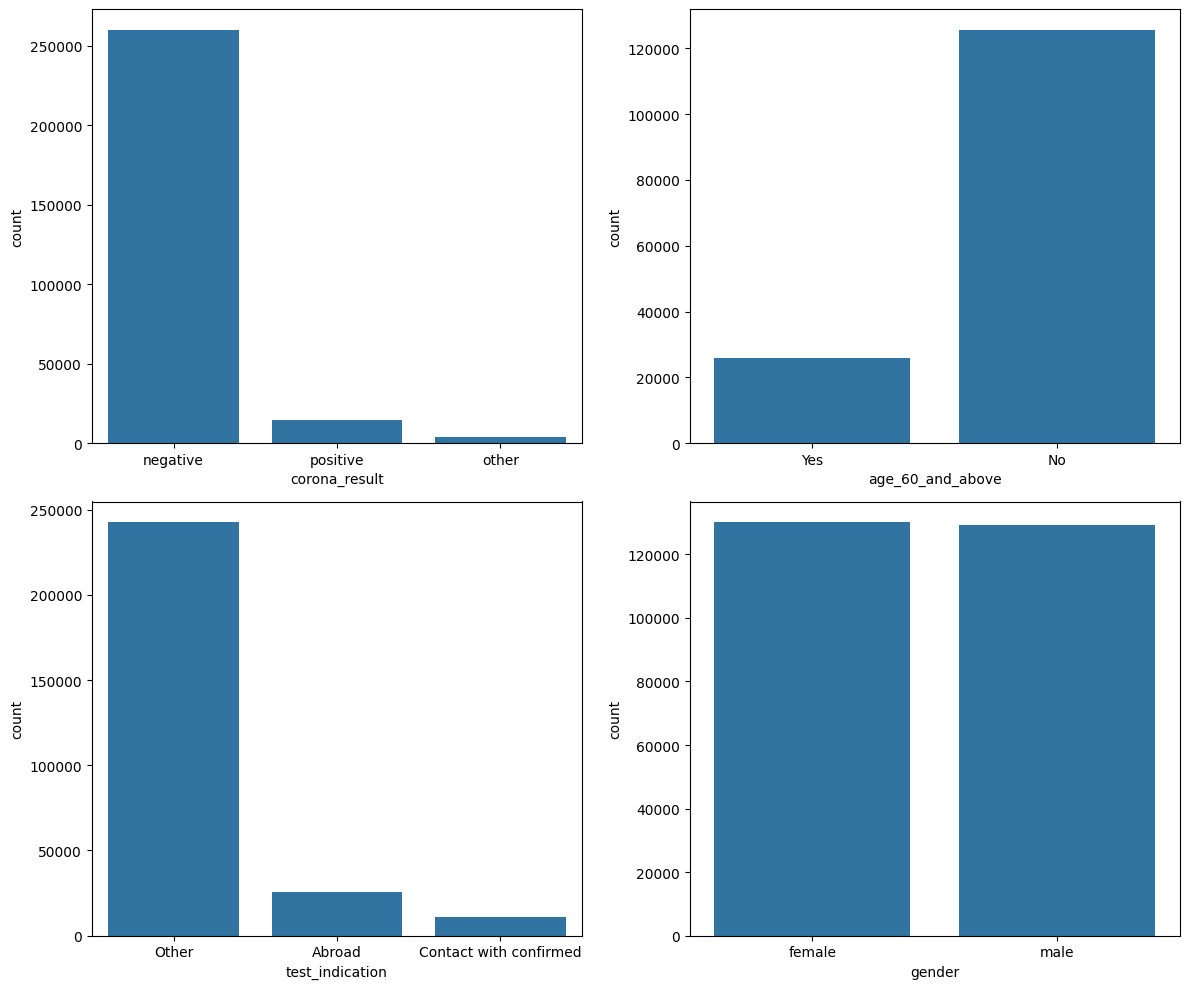

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Plot for Column1
plt.subplot(2, 2, 1)
sns.countplot(x='corona_result', data=df)

# Plot for Column2
plt.subplot(2, 2, 2)
sns.countplot(x='age_60_and_above', data=df)

# Plot for Column3
plt.subplot(2, 2, 3)
sns.countplot(x='test_indication', data=df)

# Plot for Column4
plt.subplot(2, 2, 4)
sns.countplot(x='gender', data=df)

# Show plot
plt.tight_layout()
plt.show()

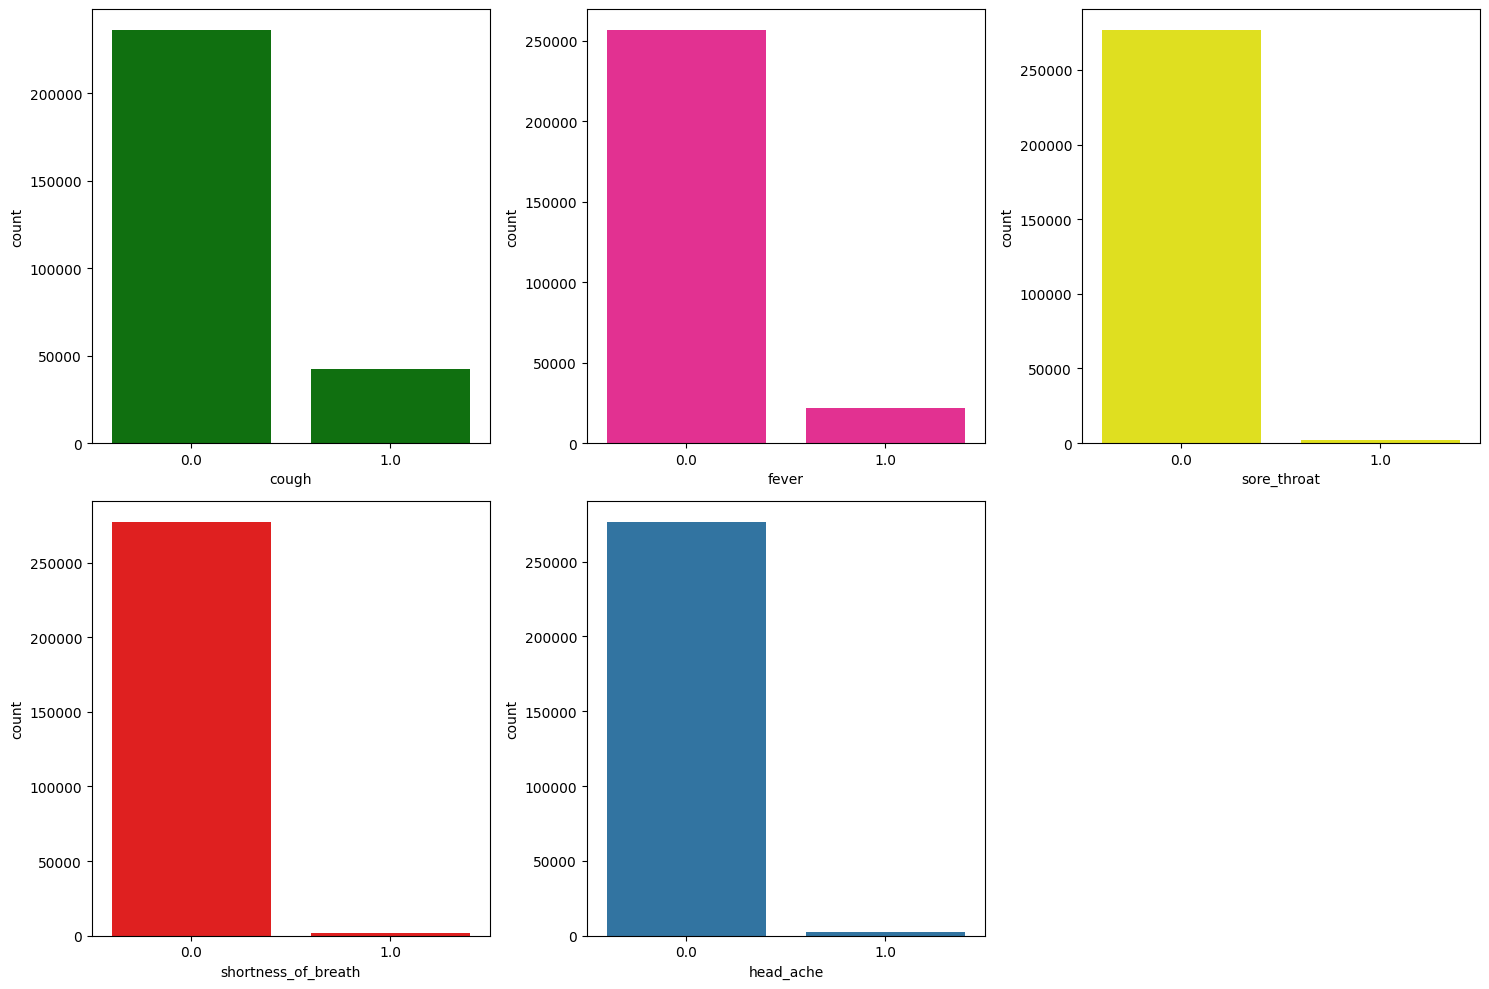

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plot for Column1
plt.subplot(2, 3, 1)
sns.countplot(x='cough', data=df, color='green')

# Plot for Column2
plt.subplot(2, 3, 2)
sns.countplot(x='fever', data=df, color='deeppink')

# Plot for Column3
plt.subplot(2, 3, 3)
sns.countplot(x='sore_throat', data=df, color='yellow')

# Plot for Column4
plt.subplot(2, 3, 4)
sns.countplot(x='shortness_of_breath', data=df, color='red')

# Plot for Column5
plt.subplot(2, 3, 5)
sns.countplot(x='head_ache', data=df)

# Show plot
plt.tight_layout()
plt.show()

## Bivariate Analysis

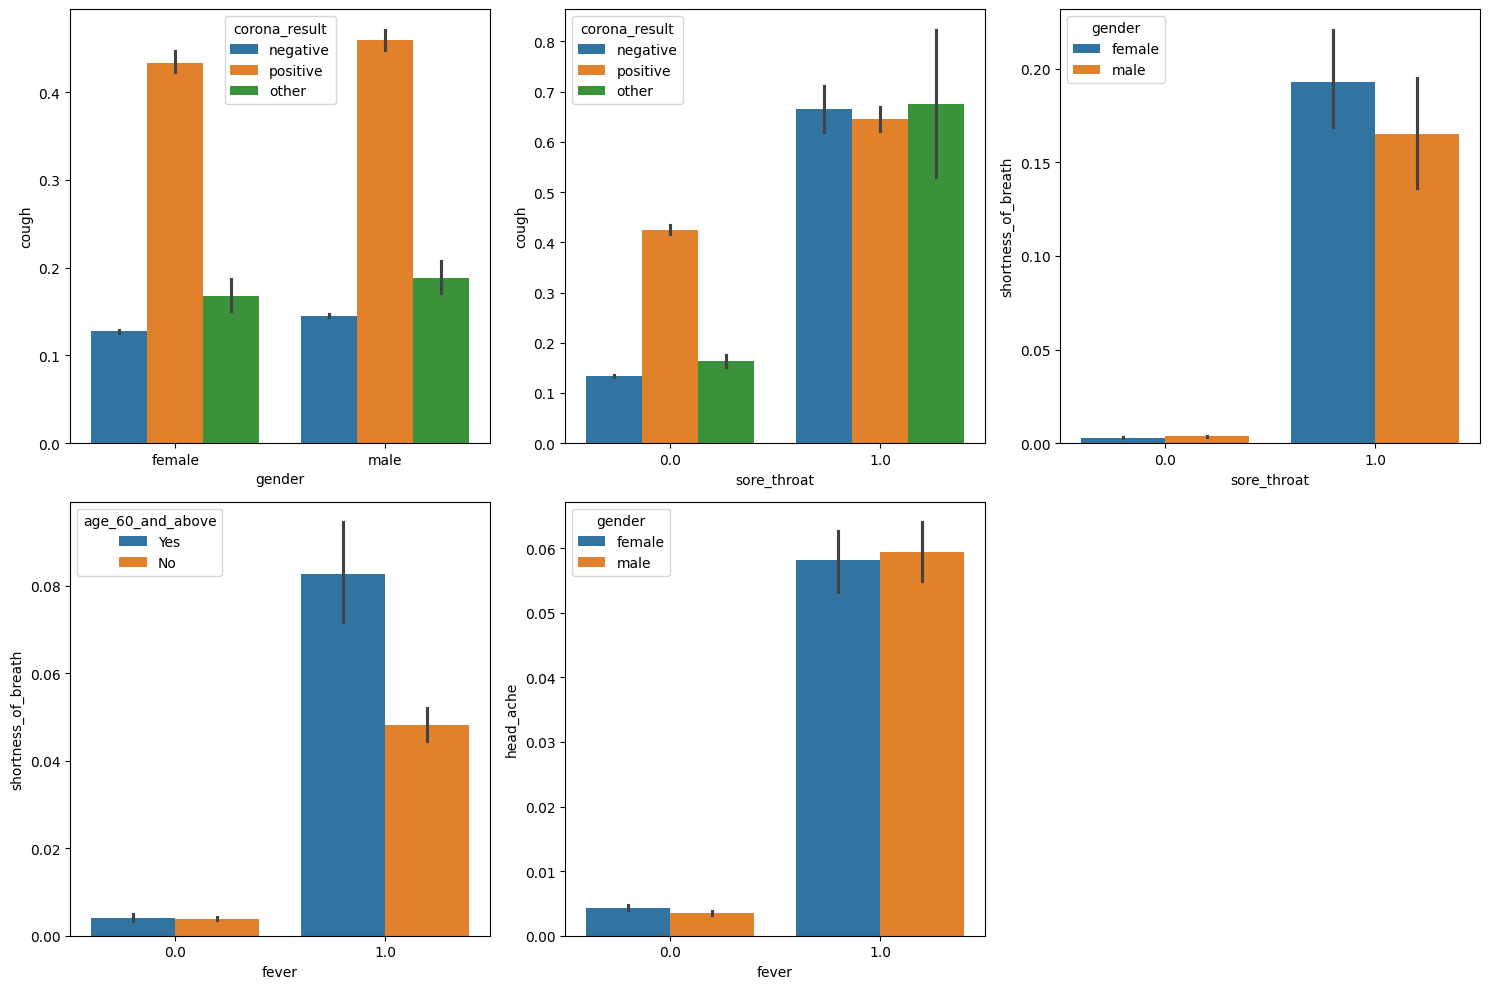

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plot for Column1
plt.subplot(2, 3, 1)
sns.barplot(data=df, x='gender', y='cough' ,hue=df['corona_result'])

# Plot for Column2
plt.subplot(2, 3, 2)
sns.barplot(data=df, x='sore_throat', y='cough' ,hue=df['corona_result'])

# Plot for Column3
plt.subplot(2, 3, 3)
sns.barplot(data=df ,x='sore_throat', y='shortness_of_breath', hue=df['gender'])

# Plot for Column4
plt.subplot(2, 3, 4)
sns.barplot(data=df ,x='fever', y='shortness_of_breath', hue=df['age_60_and_above'])

# Plot for Column5
plt.subplot(2, 3, 5)
sns.barplot(data=df ,x='fever', y='head_ache', hue=df['gender'])

# Show plot
plt.tight_layout()
plt.show()

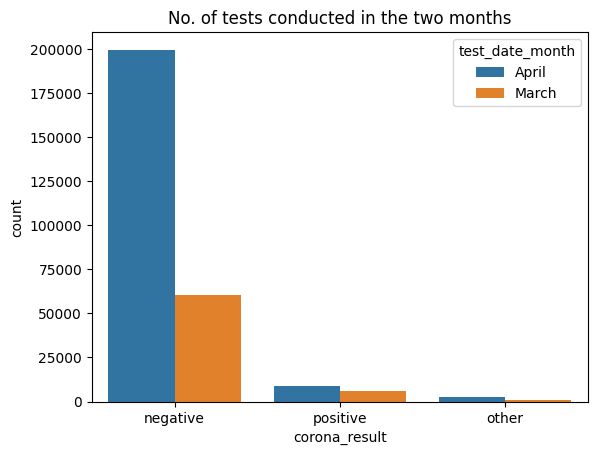

In [ ]:
plt.title("No. of tests conducted in the two months")
sns.countplot(data=df, x='corona_result', hue='test_date_month')
plt.show()

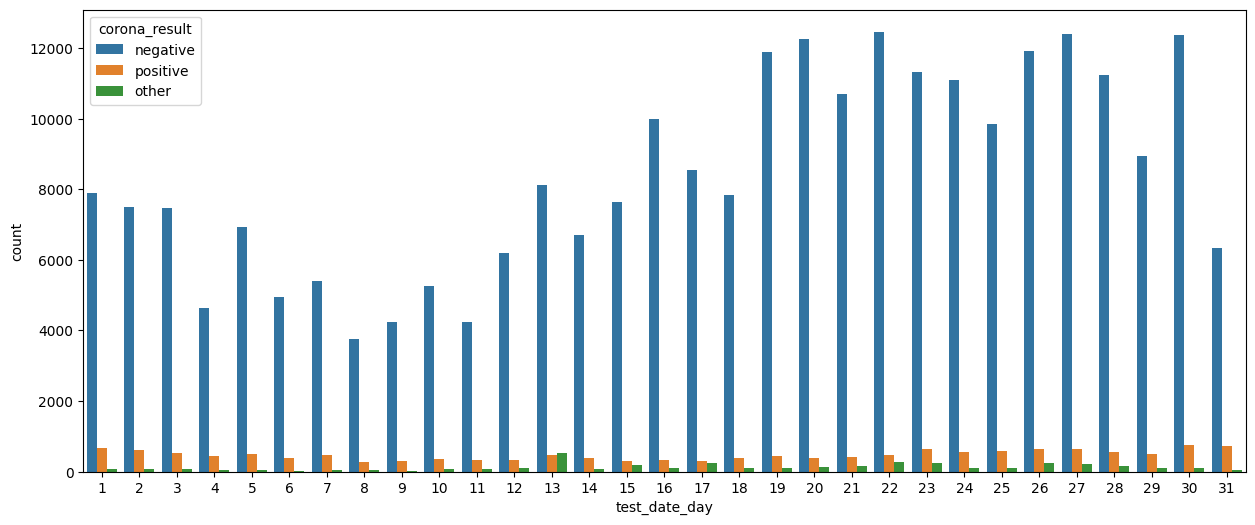

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='test_date_day', hue='corona_result')
plt.show()

## Train test split

In [ ]:
from sklearn.model_selection import train_test_split

X = df
y = df['corona_result']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
X_train

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,test_date_month,test_date_day
95011,2020-04-18,0.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other,April,18
149262,2020-04-10,0.0,0.0,0.0,0.0,0.0,negative,No,male,Other,April,10
170331,2020-04-06,1.0,0.0,0.0,0.0,0.0,negative,No,male,Abroad,April,6
21499,2020-04-27,0.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other,April,27
234875,2020-03-28,0.0,0.0,0.0,0.0,0.0,negative,No,female,Other,March,28
...,...,...,...,...,...,...,...,...,...,...,...,...
33867,2020-04-25,0.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other,April,25
84434,2020-04-19,1.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other,April,19
95816,2020-04-18,0.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other,April,18
203245,2020-04-01,0.0,0.0,0.0,0.0,0.0,negative,No,male,Other,April,1


## Handling Missing data

In [ ]:
X_train['age_60_and_above_imputed'] = X_train['age_60_and_above']
X_test['age_60_and_above_imputed'] = X_test['age_60_and_above']

X_train['gender_imputed'] = X_train['gender']
X_test['gender_imputed'] = X_test['gender']

In [ ]:
X_train.sample(5)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,test_date_month,test_date_day,age_60_and_above_imputed,gender_imputed
255940,2020-03-24,1.0,1.0,0.0,0.0,0.0,negative,No,male,Abroad,March,24,No,male
131412,2020-04-13,0.0,0.0,0.0,0.0,0.0,negative,Yes,female,Other,April,13,Yes,female
270949,2020-03-18,1.0,0.0,0.0,0.0,0.0,positive,No,NaN,Abroad,March,18,No,NaN
230599,2020-03-28,0.0,0.0,0.0,0.0,0.0,negative,No,male,Other,March,28,No,male
113172,2020-04-16,0.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other,April,16,NaN,female


In [ ]:
X_train['age_60_and_above_imputed'][X_train['age_60_and_above_imputed'].isnull()] = X_train['age_60_and_above'].dropna().sample(X_train['age_60_and_above'].isnull().sum()).values
X_test['age_60_and_above_imputed'][X_test['age_60_and_above_imputed'].isnull()] = X_train['age_60_and_above'].dropna().sample(X_test['age_60_and_above'].isnull().sum()).values

X_train['gender_imputed'][X_train['gender_imputed'].isnull()] = X_train['gender'].dropna().sample(X_train['gender'].isnull().sum()).values
X_test['gender_imputed'][X_test['gender_imputed'].isnull()] = X_train['gender'].dropna().sample(X_test['gender'].isnull().sum()).values

<ipython-input-94-d576f0592fb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['age_60_and_above_imputed'][X_train['age_60_and_above_imputed'].isnull()] = X_train['age_60_and_above'].dropna().sample(X_train['age_60_and_above'].isnull().sum()).values
<ipython-input-94-d576f0592fb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['age_60_and_above_imputed'][X_test['age_60_and_above_imputed'].isnull()] = X_train['age_60_and_above'].dropna().sample(X_test['age_60_and_above'].isnull().sum()).values
<ipython-input-94-d576f0592fb5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [ ]:
temp = pd.concat(
        [
            X_train['age_60_and_above'].value_counts() / len(X_train['age_60_and_above'].dropna()),
            X_train['age_60_and_above_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [ ]:
temp

,original,imputed
No,0.829225,0.829014
Yes,0.170775,0.170986


In [ ]:
temp = pd.concat(
        [
            X_train['gender'].value_counts() / len(X_train['gender'].dropna()),
            X_train['gender_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
female,0.502439,0.401715
male,0.497561,0.398283


In [ ]:
X_train['cough_imputed'] = X_train['cough']
X_test['cough_imputed'] = X_test['cough']

X_train['cough_imputed'][X_train['cough_imputed'].isnull()] = X_train['cough'].dropna().sample(X_train['cough'].isnull().sum()).values
X_test['cough_imputed'][X_test['cough_imputed'].isnull()] = X_train['cough'].dropna().sample(X_test['cough'].isnull().sum()).values

<ipython-input-98-940468ff2991>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['cough_imputed'][X_train['cough_imputed'].isnull()] = X_train['cough'].dropna().sample(X_train['cough'].isnull().sum()).values
<ipython-input-98-940468ff2991>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['cough_imputed'][X_test['cough_imputed'].isnull()] = X_train['cough'].dropna().sample(X_test['cough'].isnull().sum()).values


In [ ]:
X_train['fever_imputed'] = X_train['fever']
X_test['fever_imputed'] = X_test['fever']

X_train['fever_imputed'][X_train['fever_imputed'].isnull()] = X_train['fever'].dropna().sample(X_train['fever'].isnull().sum()).values
X_test['fever_imputed'][X_test['fever_imputed'].isnull()] = X_train['fever'].dropna().sample(X_test['fever'].isnull().sum()).values

<ipython-input-99-036d506f002b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['fever_imputed'][X_train['fever_imputed'].isnull()] = X_train['fever'].dropna().sample(X_train['fever'].isnull().sum()).values
<ipython-input-99-036d506f002b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['fever_imputed'][X_test['fever_imputed'].isnull()] = X_train['fever'].dropna().sample(X_test['fever'].isnull().sum()).values


In [ ]:
X_train.drop(['cough', 'fever', 'age_60_and_above', 'gender'], axis=1, inplace=True)
X_test.drop(['cough', 'fever', 'age_60_and_above', 'gender'], axis=1, inplace=True)

In [ ]:
X_train.rename(columns={'age_60_and_above_imputed': 'age_60_and_above', 'gender_imputed': 'gender', 'cough_imputed' : 'cough', 'fever_imputed' : 'fever'}, inplace=True)
X_test.rename(columns={'age_60_and_above_imputed': 'age_60_and_above', 'gender_imputed': 'gender', 'cough_imputed' : 'cough', 'fever_imputed' : 'fever'}, inplace=True)

In [ ]:
X_train.drop('corona_result', axis=1, inplace=True)
X_test.drop('corona_result', axis=1, inplace=True)

In [ ]:
X_train.isnull().mean() * 100

test_date              0.0
sore_throat            0.0
shortness_of_breath    0.0
head_ache              0.0
test_indication        0.0
test_date_month        0.0
test_date_day          0.0
age_60_and_above       0.0
gender                 0.0
cough                  0.0
fever                  0.0
dtype: float64

## Encoding on categorical columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(y_train)

LabelEncoder()

In [ ]:
le.classes_

array(['negative', 'other', 'positive'], dtype=object)

In [ ]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(drop='first'),['age_60_and_above','gender','test_indication','test_date_month'])
],remainder='passthrough')

In [ ]:
# Fit and transform on the training data
X_train_encoded = transformer.fit_transform(X_train)

# Transform the test data
X_test_encoded = transformer.transform(X_test)

In [ ]:
# Convert the transformed training data array to a DataFrame
X_train = pd.DataFrame(X_train_encoded, columns=transformer.get_feature_names_out())

# Convert the transformed test data array to a DataFrame
X_test = pd.DataFrame(X_test_encoded, columns=transformer.get_feature_names_out())

In [ ]:
X_train.drop('remainder__test_date', axis=1, inplace=True)
X_test.drop('remainder__test_date', axis=1, inplace=True)

In [ ]:
X_test.isnull().mean()*100

tnf1__age_60_and_above_Yes                      0.0
tnf1__gender_male                               0.0
tnf1__test_indication_Contact with confirmed    0.0
tnf1__test_indication_Other                     0.0
tnf1__test_date_month_March                     0.0
remainder__sore_throat                          0.0
remainder__shortness_of_breath                  0.0
remainder__head_ache                            0.0
remainder__test_date_day                        0.0
remainder__cough                                0.0
remainder__fever                                0.0
dtype: float64

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
# Convert target data to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape

(223077, 3)

In [ ]:
# Define the new learning rate
new_learning_rate = 0.002196  # Update with your desired learning rate

# Create an optimizer with the new learning rate
optimizer = Adam(learning_rate=new_learning_rate)

In [ ]:
model=Sequential()
model.add(Dense(128,input_dim=11,activation='relu'))

model.add(Dense(32,activation='relu'))
model.add(Dense(416,activation='relu'))

model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(352,activation='relu'))
model.add(Dense(480,activation='relu'))
model.add(Dense(160,activation='relu'))

model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1536      
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 416)               13728     
                                                                 
 dense_8 (Dense)             (None, 32)                13344     
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 352)               22880     
                                                                 
 dense_11 (Dense)            (None, 480)              

In [ ]:
history = model.fit(X_train,y_train,validation_data= (X_test, y_test),batch_size=20,epochs=10,verbose=1)

Epoch 1/10
11154/11154 [==============================] - 66s 6ms/step - loss: 0.1936 - accuracy: 0.9510 - val_loss: 0.1994 - val_accuracy: 0.9482
Epoch 2/10
11154/11154 [==============================] - 56s 5ms/step - loss: 0.1816 - accuracy: 0.9544 - val_loss: 0.1816 - val_accuracy: 0.9552
Epoch 3/10
11154/11154 [==============================] - 62s 6ms/step - loss: 0.1788 - accuracy: 0.9552 - val_loss: 0.1819 - val_accuracy: 0.9537
Epoch 4/10
11154/11154 [==============================] - 60s 5ms/step - loss: 0.1782 - accuracy: 0.9555 - val_loss: 0.1793 - val_accuracy: 0.9555
Epoch 5/10
11154/11154 [==============================] - 56s 5ms/step - loss: 0.1770 - accuracy: 0.9556 - val_loss: 0.1814 - val_accuracy: 0.9549
Epoch 6/10
11154/11154 [==============================] - 61s 5ms/step - loss: 0.1767 - accuracy: 0.9557 - val_loss: 0.1789 - val_accuracy: 0.9559
Epoch 7/10
11154/11154 [==============================] - 56s 5ms/step - loss: 0.1762 - accuracy: 0.9562 - val_loss: 0

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

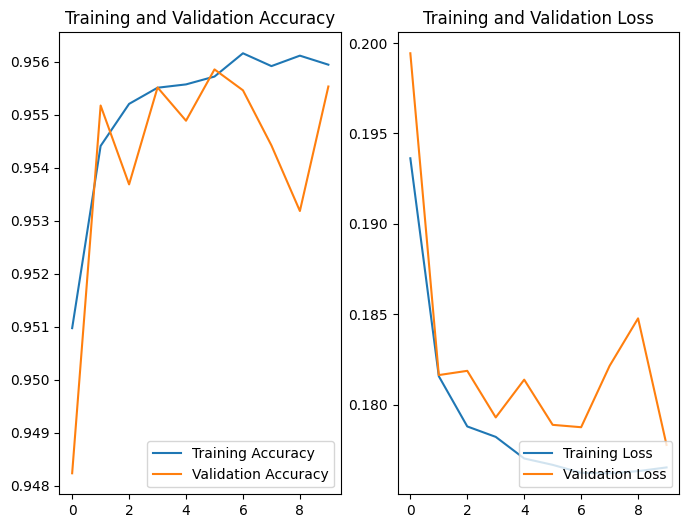

In [ ]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred = model.predict(X_test)

1743/1743 [==============================] - 3s 2ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Compute and print classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     52024
           1       0.00      0.00      0.00       808
           2       0.78      0.59      0.67      2938

    accuracy                           0.96     55770
   macro avg       0.58      0.53      0.55     55770
weighted avg       0.94      0.96      0.95     55770



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


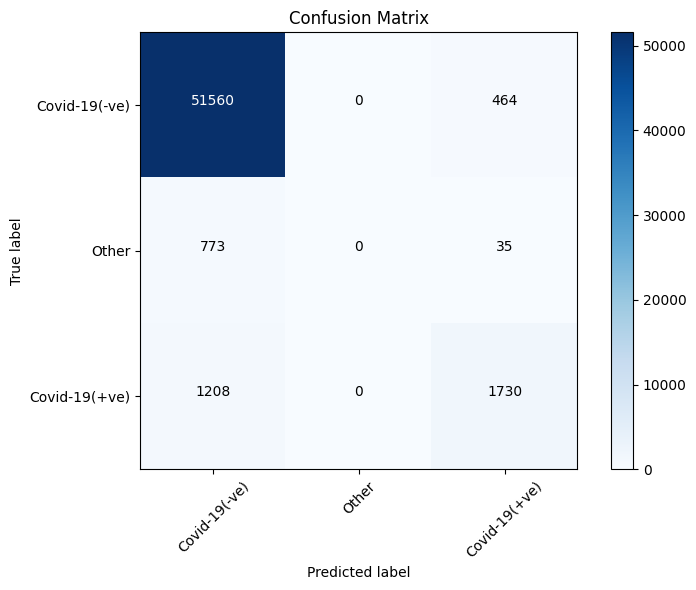

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Covid-19(-ve)', 'Other', 'Covid-19(+ve)']  # Update with your actual class labels
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

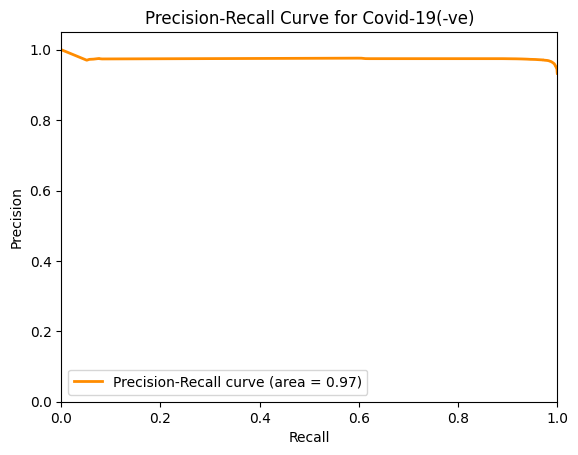

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

# Extracting probabilities for class 0
y_test_class_0 = y_test[:, 0]
y_pred_class_0 = y_pred[:, 0]

# Compute Precision-Recall curve and Precision-Recall area for class 0
precision, recall, _ = precision_recall_curve(y_test_class_0, y_pred_class_0)
pr_auc = auc(recall, precision)

# Plotting Precision-Recall curve for class 0
plt.figure()
lw = 2
plt.plot(recall, precision, color='darkorange',
         lw=lw, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Covid-19(-ve)')
plt.legend(loc="lower left")
plt.show()

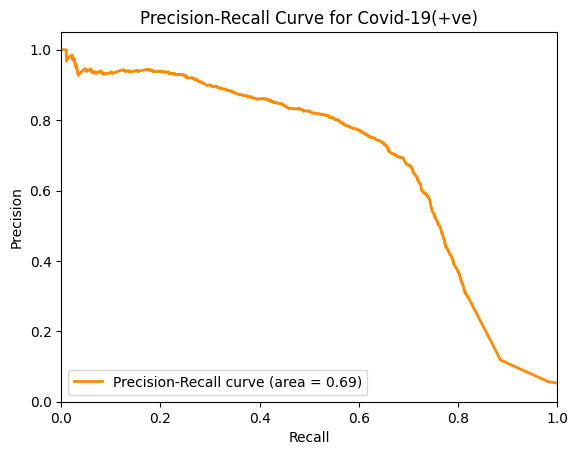

In [ ]:
# Extracting probabilities for class 2
y_test_class_0 = y_test[:, 2]
y_pred_class_0 = y_pred[:, 2]

# Compute Precision-Recall curve and Precision-Recall area for class 0
precision, recall, _ = precision_recall_curve(y_test_class_0, y_pred_class_0)
pr_auc = auc(recall, precision)

# Plotting Precision-Recall curve for class 0
plt.figure()
lw = 2
plt.plot(recall, precision, color='darkorange',
         lw=lw, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Covid-19(+ve)')
plt.legend(loc="lower left")
plt.show()

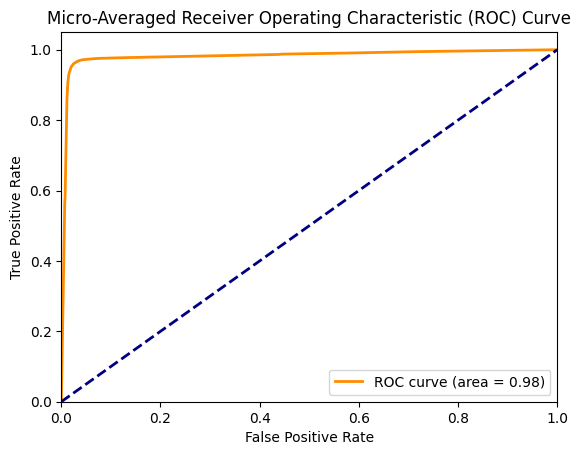

In [ ]:
# Assuming 'y_test' is the true labels for the test set
# Assuming 'y_test' contains the true labels for all three classes (0, 1, and 2)

# Compute micro-averaged ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)

# Plotting micro-averaged ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-Averaged Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


In [ ]:
from keras import layers
import keras_tuner

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    # Tune the number of layers.
    for i in range(hp.Int("num_layers", 1, 8)):
        model.add(
            layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=32, max_value=512, step=32),
                activation=hp.Choice("activation", ["relu", "tanh"]),
            )
        )
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.25))
    model.add(layers.Dense(7, activation="softmax"))
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

build_model(keras_tuner.HyperParameters())

In [ ]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=5,
    executions_per_trial=2,
    overwrite=True,
    directory="/content/drive/MyDrive/Jitendra Sir ML Project",
    project_name="/content/drive/MyDrive/Jitendra Sir ML Project/my_dir",
)

In [ ]:
tuner.search_space_summary()

In [ ]:
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

In [ ]:
tuner.results_summary()